# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

*Notebook generated with the assistance of AI. Please use caution when interpreting code or results, and verify procedures as needed.*

---

## Overview

[Dandiset 000563](https://dandiarchive.org/dandiset/000563/0.250311.2145) contains Neuropixels extracellular electrophysiology data from mouse visual system, focusing on temporal precision of neural responses to white noise visual stimuli ("barcoding"). This unique dataset includes LFP, spike data, and comprehensive metadata, spanning multiple brain areas and includes innovative visual stimulation protocols.

**Key facts:**
- Species: Mus musculus (mouse)
- Data: Neuropixels probe recordings (LFP, spikes), optogenetics, metadata
- Format: NWB (Neurodata Without Borders)

This notebook demonstrates:
1. Browsing Dandiset assets using the DANDI API
2. Streaming and reading NWB files without downloading
3. Exploring electrode metadata and probe layout
4. Visualizing example LFP data

---

## Requirements

This notebook assumes you have the following Python packages installed:
- numpy
- pandas
- matplotlib
- pynwb
- h5py
- remfile
- dandi

Let's get started!

# %% [markdown]
## List Dandiset Assets with the DANDI API

Here we use the DANDI API to enumerate some files within this Dandiset. This helps reveal the structure and options for analysis.

In [1]:
from dandi.dandiapi import DandiAPIClient

dandiset_id = "000563"
dandiset_version = "0.250311.2145"
dandi_url = f"https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}"

print(f"Dandiset: {dandiset_id} (Version: {dandiset_version})")
print(f"Link: {dandi_url}\n")

with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    assets = list(dandiset.get_assets())
    nwb_assets = [a for a in assets if a.path.endswith('.nwb')]
    print("Example NWB files from this Dandiset:")
    for asset in nwb_assets[:10]:
        print("-", asset.path)

Dandiset: 000563 (Version: 0.250311.2145)
Link: https://dandiarchive.org/dandiset/000563/0.250311.2145



Example NWB files from this Dandiset:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb
- sub-699241/sub-699241_ses-1318772854_ogen.nwb
- sub-699241/sub-699241_ses-1318772854_probe-2_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-1_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-2_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-4_ecephys.nwb
- sub-699846/sub-699846_ses-1314466742_probe-3_ecephys.nwb


---
## Streaming and Exploring an NWB File

NWB files in this Dandiset can be hundreds of gigabytes. We'll stream a remote file using `remfile` and inspect its contents with `h5py` and `pynwb`. This workflow lets you preview and analyze large files without full download.

We'll use:
> `sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb`

In [2]:
import remfile
import h5py
import pynwb

target_path = "sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb"

# Use DANDI API to find direct download URL for the target NWB file
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    asset = next(dandiset.get_assets_by_glob(target_path))
    url = asset.download_url
print(f"Streaming file: {url}")

# Open remote file for streaming
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

Streaming file: https://api.dandiarchive.org/api/dandisets/000563/versions/0.250311.2145/assets/55148cf3-9d15-4d05-a190-4a73e007e48d/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Basic NWB Metadata

In [3]:
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Session ID:", nwb.session_id)
print("Institution:", nwb.institution)
print("Stimulus notes:", nwb.stimulus_notes)
print("File identifier:", nwb.identifier)
print("File creation date(s):", [d.isoformat() for d in nwb.file_create_date])
print("\nSubject info:")
print("  Subject ID:", nwb.subject.subject_id)
print("  Genotype:", nwb.subject.genotype)
print("  Age:", nwb.subject.age, f"({nwb.subject.age_in_days} days)")
print("  Sex:", nwb.subject.sex)
print("  Strain:", nwb.subject.strain)
print("  Species:", nwb.subject.species)

Session description: LFP data and associated info for one probe
Session start time: 2023-12-19 00:00:00-08:00
Session ID: 1318772854
Institution: Allen Institute for Brain Science
Stimulus notes: OpenScopeTemporalBarcode
File identifier: 1
File creation date(s): ['2024-02-22T23:47:13.128007-08:00']

Subject info:
  Subject ID: 699241
  Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
  Age: P124D (124.0 days)
  Sex: M
  Strain: Transgenic
  Species: Mus musculus


---
## Examine Probe and Electrode Metadata

Each NWB file contains information about the Neuropixels probe (device and electrode group) and a detailed electrode metadata table.

In [4]:
import pandas as pd

# Print device/probe info
for name, dev in nwb.devices.items():
    print(f"Device: {name}")
    print("  Description:", getattr(dev, "description", ""))
    print("  Manufacturer:", getattr(dev, "manufacturer", ""))
    print("  Probe ID:", getattr(dev, "probe_id", ""))
    print("  Sampling rate [Hz]:", getattr(dev, "sampling_rate", ""))

# Print electrode group info
print("\nElectrode Groups:")
for name, group in nwb.electrode_groups.items():
    print(f"  Group: {name}")
    print("    Location:", group.location)
    print("    Has LFP data:", getattr(group, "has_lfp_data", None))
    print("    Probe ID:", getattr(group, "probe_id", None))
    print("    LFP sampling rate [Hz]:", getattr(group, "lfp_sampling_rate", None))

Device: probeC
  Description: Neuropixels 1.0 Probe
  Manufacturer: imec
  Probe ID: 1
  Sampling rate [Hz]: 30000.0

Electrode Groups:
  Group: probeC
    Location: See electrode locations
    Has LFP data: True
    Probe ID: 1
    LFP sampling rate [Hz]: 625.0


### Inspect Electrode Table

The `electrodes` DynamicTable contains per-channel metadata including brain region, position, valid_data, and hardware filtering.

In [5]:
elec_df = nwb.electrodes.to_dataframe()
print(f"Electrodes table shape: {elec_df.shape}")
elec_df.head()

Electrodes table shape: (96, 13)


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
1002,Eth,probeC abc.EcephysElectrodeGroup at 0x12348113...,probeC,40,59,1,2,True,7543.0,3332.0,7104.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1006,Eth,probeC abc.EcephysElectrodeGroup at 0x12348113...,probeC,80,59,1,6,True,7554.0,3299.0,7109.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1010,LP,probeC abc.EcephysElectrodeGroup at 0x12348113...,probeC,120,59,1,10,True,7565.0,3265.0,7114.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1014,LP,probeC abc.EcephysElectrodeGroup at 0x12348113...,probeC,160,59,1,14,True,7579.0,3224.0,7119.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1018,LP,probeC abc.EcephysElectrodeGroup at 0x12348113...,probeC,200,59,1,18,True,7590.0,3191.0,7123.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


### Visualize Electrode Geometry (x, y, z)

Let's plot the Neuropixels array geometry for this probe to visualize the spatial relationship of electrodes.

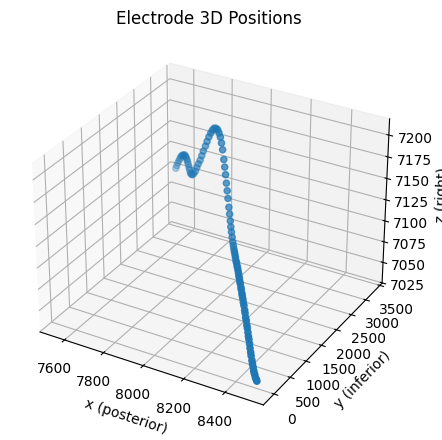

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(elec_df['x'], elec_df['y'], elec_df['z'])
ax.set_xlabel('x (posterior)')
ax.set_ylabel('y (inferior)')
ax.set_zlabel('z (right)')
ax.set_title('Electrode 3D Positions')
plt.tight_layout()
plt.show()

---
## Load and Plot Example LFP Data

The `acquisition` group contains LFP (`probe_1_lfp_data`). We will extract a short time window from several channels and plot them.

LFP Data shape: (10178133, 96)
LFP Timestamp shape: (10178133,)
LFP unit: volts


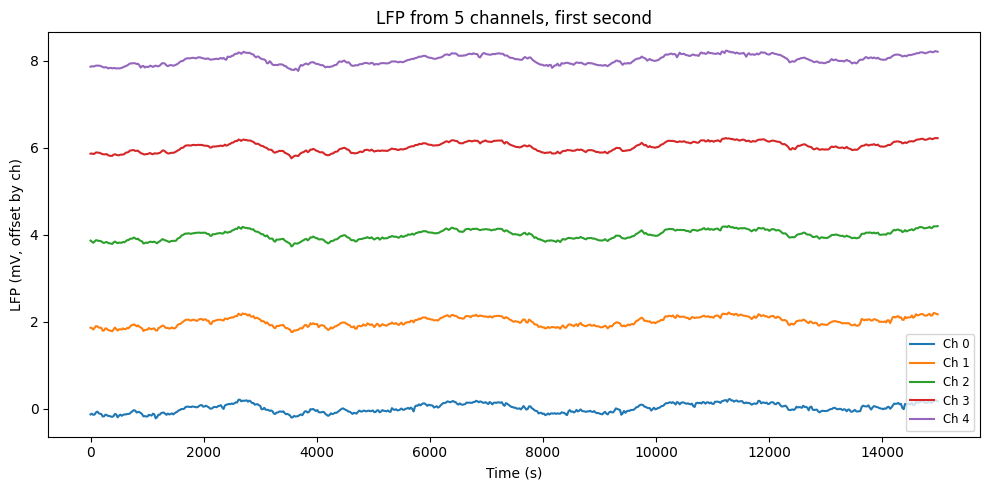

In [7]:
import numpy as np

lfp = nwb.acquisition["probe_1_lfp_data"]
print("LFP Data shape:", lfp.data.shape)
print("LFP Timestamp shape:", lfp.timestamps.shape)
print("LFP unit:", lfp.unit)

# Grab first 1 second for 5 channels
lfp_sr = nwb.electrode_groups['probeC'].lfp_sampling_rate  # 625 Hz
nsamp = int(lfp_sr * 1.0)
channels = np.arange(5)
lfp_snippet = lfp.data[:nsamp, channels]
lfp_times = lfp.timestamps[:nsamp]

plt.figure(figsize=(10, 5))
offset = 0
for i, ch in enumerate(channels):
    plt.plot(lfp_times, lfp_snippet[:, i]*1e3 + i*2, label=f'Ch {ch}')
plt.xlabel('Time (s)')
plt.ylabel('LFP (mV, offset by ch)')
plt.title('LFP from 5 channels, first second')
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

---
## Summary and Next Steps

In this notebook, we:
- Explored the organization of Dandiset 000563 on DANDI
- Streamed an NWB file and inspected its experimental metadata
- Examined probe configuration and visualized electrode geometry
- Loaded and plotted an LFP data snippet

**You are now ready to:**
- Analyze longer time segments, specific brain regions, or LFP features
- Explore additional probe files or investigate optogenetic/units data
- Leverage this workflow for your own spike/LFP analyses or comparisons across sessions and probes

See the [Dandiset page](https://dandiarchive.org/dandiset/000563/0.250311.2145) for documentation, links, and further scientific details.

---
*End of notebook*